In [9]:
import numpy as np
from scipy.signal import find_peaks

# Simulated signal representing ultrasonic reflections
signal = np.sin(np.linspace(0, 20, 500)) + np.random.normal(0, 0.1, 500)
peaks, _ = find_peaks(signal, height=0)

# Detect significant peaks indicating potential defects
for peak in peaks:
    if signal[peak] > 1.5:  # Threshold for defect
        print(f"Potential defect detected at index {peak}")

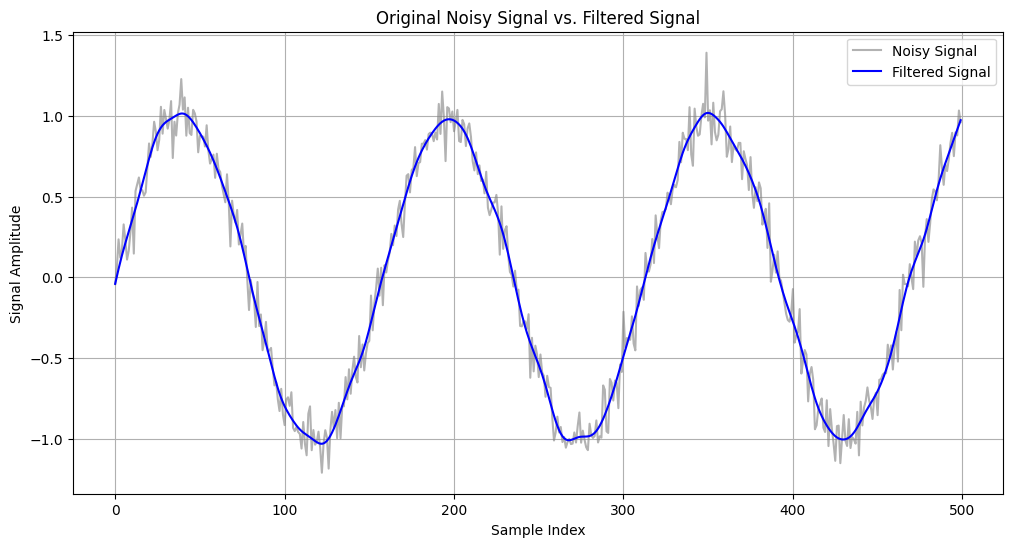

In [10]:
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Apply a low-pass filter to reduce noise
b, a = butter(3, 0.1, btype='low')  # Butterworth filter, adjust frequency as needed
filtered_signal = filtfilt(b, a, signal)

plt.figure(figsize=(12, 6))
plt.plot(signal, label="Noisy Signal", color="gray", alpha=0.6)
plt.plot(filtered_signal, label="Filtered Signal", color="blue")
plt.title("Original Noisy Signal vs. Filtered Signal")
plt.xlabel("Sample Index")
plt.ylabel("Signal Amplitude")
plt.legend()
plt.grid(True)
plt.show()


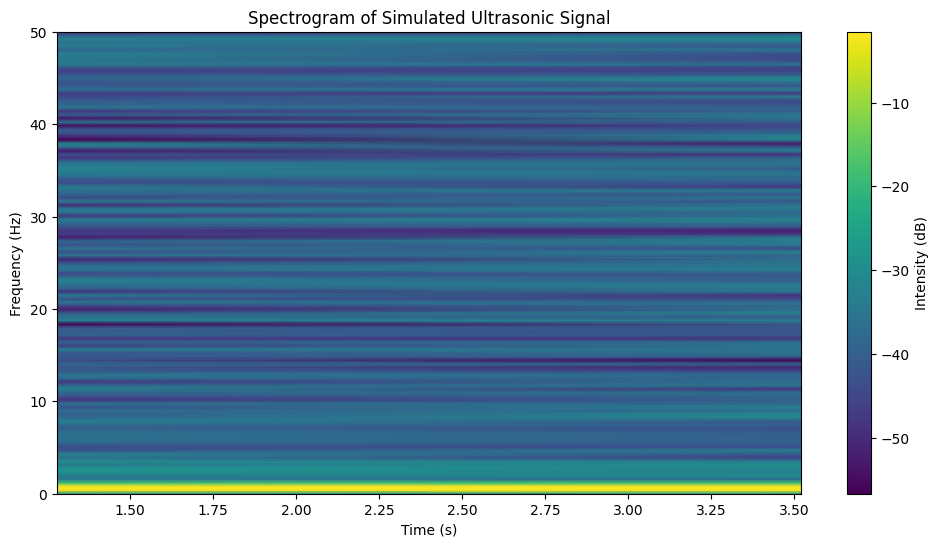

In [12]:
from scipy.signal import spectrogram

frequencies, times, Sxx = spectrogram(signal, fs=100)  # Adjust sampling frequency as needed

plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.colorbar(label="Intensity (dB)")
plt.title("Spectrogram of Simulated Ultrasonic Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
